# ADP 24회  복기
## 1. 결석일수 회귀분석 문제
(설명변수) 1. sex, 2. age, 3. Pstatus, 4. Medu, 5. Fedu, 6. guardian, 7. traveltime, 8. studytime, 9. failures, 10. famrel, 11. freetime.   
(종속변수) 12. absences

### 1-1-1. EDA 하시오 (시각화 포함)
### 1-1-2. 전처리 하시오 (시각화 포함)
### 1-1-3. 여기에 하지 않았지만 추가할 수 있는 전처리를 설명하시고, 타당한 이유와 기대효과를 쓰세요.

### 1-2-1. 적용 가능한 알고리즘 3개 언급하고, 그 중 2개를 선택한 이유를 논리적으로 설명하세요. 
### 1-2-2. 모델 성능 평가 지표를 뭘로 쓸건지, 그 이유는 뭔지 쓰세요.
### 1-2-3. 2개 알고리즘을 실제로 프로그래밍하고 성능 평가를 시각화 통해 비교하고 설명하세요.

### 1-3-1. 실제로 사용가능한 모델인지 설명해보세요.
### 1-3-2. 다양한 환경에서 적용할 수 있는 방안을 설명해보세요.
### 1-3-3. 추가적으로 모델을 개선할 수 있는 방안을 설명해보세요.

In [71]:
from pandas import read_csv
df = read_csv('1_student-mat.csv', sep=';').filter(['sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'absences'])
df.columns

Index(['sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'guardian', 'traveltime',
       'studytime', 'failures', 'famrel', 'freetime', 'absences'],
      dtype='object')

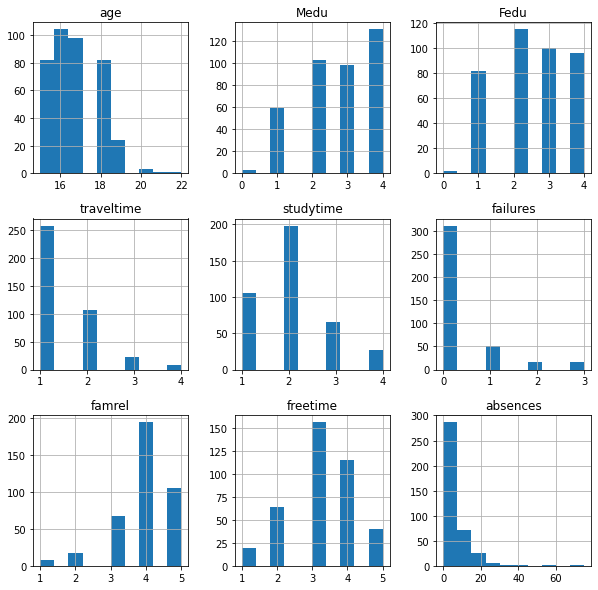

In [72]:
### 1-1-1. EDA 하시오 (시각화 포함)
# 변수 분포 확인
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
df.hist()
plt.show()

In [73]:
#결측치 없음
df.describe(include='all')

,sex,age,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,famrel,freetime,absences
count,395,395.000000,395,395.000000,395.000000,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,F,NaN,T,NaN,NaN,mother,NaN,NaN,NaN,NaN,NaN,NaN
freq,208,NaN,354,NaN,NaN,273,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.696203,NaN,2.749367,2.521519,NaN,1.448101,2.035443,0.334177,3.944304,3.235443,5.708861
std,NaN,1.276043,NaN,1.094735,1.088201,NaN,0.697505,0.839240,0.743651,0.896659,0.998862,8.003096
min,NaN,15.000000,NaN,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,NaN,16.000000,NaN,2.000000,2.000000,NaN,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,NaN,17.000000,NaN,3.000000,2.000000,NaN,1.000000,2.000000,0.000000,4.000000,3.000000,4.000000
75%,NaN,18.000000,NaN,4.000000,3.000000,NaN,2.000000,2.000000,0.000000,5.000000,4.000000,8.000000


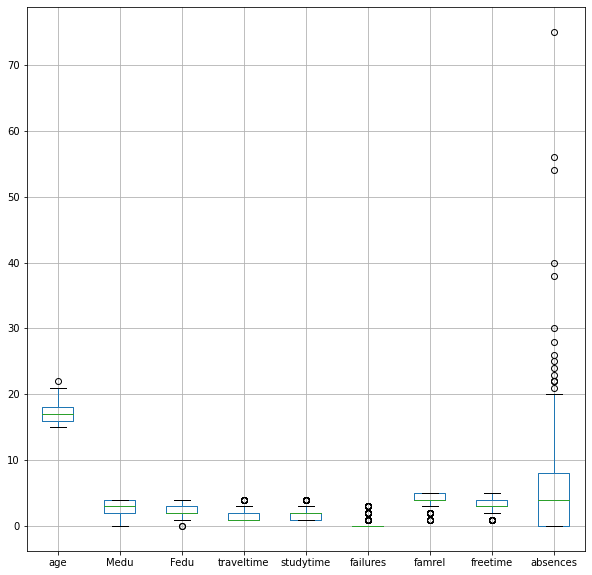

In [74]:
df.boxplot()

In [75]:
df.dtypes

sex           object
age            int64
Pstatus       object
Medu           int64
Fedu           int64
guardian      object
traveltime     int64
studytime      int64
failures       int64
famrel         int64
freetime       int64
absences       int64
dtype: object

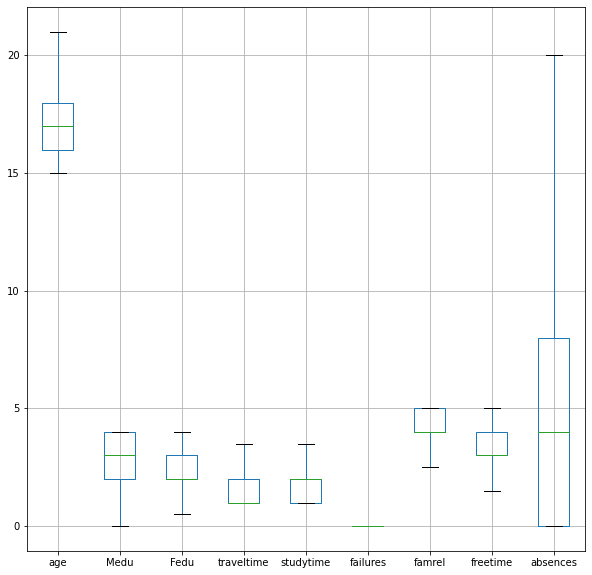

In [76]:
### 1-1-2. 전처리 하시오 (시각화 포함)
# 이상치 조정 (winsorizing)
from pandas import DataFrame, merge
df2 = df.copy()
for col in df.columns:
    if type(df[col][0]) == str: #범주형 변수는 pass
        continue
    else:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        top = df[col].quantile(0.75) + IQR*1.5
        down = df[col].quantile(0.25) - IQR*1.5
        df2[col] = df[col].clip(top, down)
df2.boxplot()
plt.show()

In [77]:
# 더미변수 생성, 변수 변환
from pandas import get_dummies
df3 = get_dummies(df2, drop_first=True)

from sklearn.preprocessing import StandardScaler
X = df3.drop('absences', axis=1)
y = df3['absences']
X= StandardScaler().fit_transform(X)
X.shape

(395, 12)

In [79]:
from sklearn.preprocessing import SplineTransformer
spline = SplineTransformer(degree=2, n_knots=3)
spline_X = spline.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spline_X, y)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
fitted = LR.fit(X_train, y_train)
pred1 = fitted.predict(X_test)
pred2 = fitted.predict(X_train)

from sklearn.metrics import mean_absolute_percentage_error, r2_score
print('test set: MAPE:', mean_absolute_percentage_error(y_test, pred1), ", R2: ", r2_score(y_test, pred1))
print('train set: ', mean_absolute_percentage_error(y_train, pred2), ", R2: ", r2_score(y_train, pred2))

test set: MAPE: 4719681427673626.0 , R2:  -0.08917553548749524
train set:  6618941133089598.0 , R2:  0.12359023746060671


In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) #interation_only=True도 가능
poly_X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_X, y)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
fitted = LR.fit(X_train, y_train)
pred1 = fitted.predict(X_test)
pred2 = fitted.predict(X_train)

from sklearn.metrics import mean_absolute_percentage_error, r2_score
print('test set: MAPE:', mean_absolute_percentage_error(y_test, pred1), ", R2: ", r2_score(y_test, pred1))
print('train set: ', mean_absolute_percentage_error(y_train, pred2), ", R2: ", r2_score(y_train, pred2))

test set: MAPE: 5278009822750410.0 , R2:  -0.1469001406806909
train set:  5197679807706970.0 , R2:  0.3559419531832403


In [ ]:
### 1-1-3. 여기에 하지 않았지만 추가할 수 있는 전처리를 설명하시고, 타당한 이유와 기대효과를 쓰세요.
# 회귀 결과에 영향을 미치는 영향치를 Cook's distance, DFBETAS, DFFITS 등 기준에 따라 발견하고 제거하여 영향치에 의해 왜곡되지 않은 합리적이고 일반적인 회귀 모델링을 할 수 있음
# feature 간 높은 상관관계를 보이는 다중공선성을 제거하기 위헤 VIF값에 따라 최적의 Feature를 선별할 수 있다. 다중공선성이 높은 경우, 결정계수 R2값은 높아 회귀식의 설명력은 높지만 식안의 독립변수의 P값(P-value)이 커서 개별 인자들이 유의하지 않는 경우가 있기 때문에 이처럼 상관성이 높은 feature를 제거하거나 PCA에 의해 다중공선성을 제거하기도 한다.

In [ ]:
### 1-2-1. 적용 가능한 알고리즘 3개 언급하고, 그 중 2개를 선택한 이유를 논리적으로 설명하세요.
# 회귀분석에 적용 가능한 알고리즘은 다중회귀분석, SVM, RF이 있다. 이 중 통계적 방법인 다중회귀분석과 머신러닝 방법인 RF를 사용하려고 한다. 다중회귀분석은 모델링 시간이 비교적 짧고, 다른 모든 요인들로부터 한 요인의 영향을 분리할 수 있다는 장점이 있다. RF의 경우, 데이터의 이상치, 결측치에 민감하지 않고, 모델의 노이즈를 심화시키는 Overfitting 문제를 회피하여 모델 정확도를 향상시킬 수 있음. 또한, 변수 별 중요도도 확인할 수 있다.

### 1-2-2. 모델 성능 평가 지표를 뭘로 쓸건지, 그 이유는 뭔지 쓰세요.
# 결정계수와 MAPE(Mean Absolute Percentage Error)로 사용할 것이다. 결정계수를 통해 모델의 설명력을 확인하고, 0~1 사이의 값을 갖는 MAPE를 통해 그 값이 0에 가까울수록 회귀모델의 오차가 적다는 것을 쉽게 이해할 수 있기 때문이다.

In [ ]:
### 1-2-3. 2개 알고리즘을 실제로 프로그래밍하고 성능 평가를 시각화 통해 비교하고 설명하세요.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
fitted = LR.fit(X_train, y_train)
pred1 = fitted.predict(X_test)
pred2 = fitted.predict(X_train)

from sklearn.metrics import mean_absolute_percentage_error, r2_score
print('test set: MAPE:', mean_absolute_percentage_error(y_test, pred1), ", R2: ", r2_score(y_test, pred1))
print('train set: ', mean_absolute_percentage_error(y_train, pred2), ", R2: ", r2_score(y_train, pred2))

test set: MAPE: 4647039973890038.0 , R2:  0.098429838081587
train set:  6689519716163589.0 , R2:  0.09851630815406087


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
fitted2 = RF.fit(X_train, y_train)
pred3 = fitted2.predict(X_test)
pred4 = fitted2.predict(X_train)

print('test set: MAPE:', mean_absolute_percentage_error(y_test, pred3), ", R2: ", r2_score(y_test, pred3))
print('train set: ', mean_absolute_percentage_error(y_train, pred4), ", R2: ", r2_score(y_train, pred4))

test set: MAPE: 5825716972523471.0 , R2:  -0.3450426236783868
train set:  2795234168721288.0 , R2:  0.859543369566104


In [ ]:
### 1-3-1. 실제로 사용가능한 모델인지 설명해보세요. 불가...
### 1-3-2. 다양한 환경에서 적용할 수 있는 방안을 설명해보세요. 결석일수가 많은 것으로 예측되는 학생들을 뽑아서 결석일수를 상승시키는 요인들을 줄임으로써 학생들의 결석일수를 관리할 수 있다.
### 1-3-3. 추가적으로 모델을 개선할 수 있는 방안을 설명해보세요. 영향치를 제거하고, 불필요한 변수를 제거해야 할 것으로 보인다.

## 2. 연구개발비(X1) : 1 2 3 4 5 7 8 9 11 12, 광고비(X2) : (낮음, 낮음, 낮음, 낮음, 높음, 높음, 높음, 높음, 높음, 높음), 매출액(Y) : 15 16 17 18 20 22 24 26 28 29
### 2-1. 광고비를 가변수화 해서, 다중선형회귀방정식 만들고, 회귀계수 검정하시오. 
### 2-2. 회귀 모형을 검정하시오.

In [ ]:
df4 = DataFrame({'x1':[1,2,3,4,5,7,8,9,11,12], 
                 'x2':['L','L','L','L','H','H','H','H','H','H'], 
                 'y':[15, 16, 17, 18, 20, 22, 24, 26, 28, 29]})

df5 = get_dummies(df4, drop_first=True)
X = df5.drop('y', axis=1)
y = df5['y']

import statsmodels.api as sm
X = sm.add_constant(X)
model= sm.OLS(y, X)
fitted = model.fit()
fitted.summary()

#모델 자체는 높은 결정계수로 데이터 설명력이 높고, F통계량의 Pvalue도 0.05보다 작기 때문에 통계적으로 유의한 모델로 볼 수 있다. 반면, 변수 X2_L의 P-value가 0.549로 통계적으로 유의하지 않게 나왔다.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     545.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           2.07e-08
Time:                        01:27:08   Log-Likelihood:                -4.6455
No. Observations:                  10   AIC:                             15.29
Df Residuals:                       7   BIC:                             16.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6043      0.671     20.273      0.000      12.018      15.191
x1             1.2957      0.074     17.431      0.000       1.120       1.471
x2_L          -0.3435      0.546     -0.629      0.549      -1.635       0.948
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.099
Skew:                           0.157   Prob(JB):                        0.951
Kurtosis:                       2.625   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. 각각 표본수는 12개인데 A생산라인에서 만든 제품의 평균은 5.75mm, $\sigma = 0.03$ B생산라인에서 만든 제품의 평균은 5.56mm, $\sigma = 0.04$라면 5% 유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하시오. Z(0.05) = 1.65.
### 3-1. 귀무가설과 대립가설을 세우기
### 3-2. 차이가 있는지 여부 검정

In [ ]:
## 두독립표본 Z 검정
## 모표준편차를 알기 때문에 Z통계량 고려
# 귀무가설: 두 제품의 평균은 차이가 없다
# 대립가설: 두 제품의 평균은 차이가 있다
import numpy as np
avg1 = 5.75
avg2 = 5.56
n1 = 12
n2 = 12
std1 = 0.03
std2 = 0.04

SE = np.sqrt(std1**2 / n1 + std2**2 / n2) #두 표본의 표준오차
Z = (avg1 - avg2) / SE # Z통계값 구하기
print('Z통계량 {:.2f}'.format(Z))
# Z통계량이 유의수준 0.05일때의 1.65보다 크므로 p값이 0.05보다 작을 것으로 예상되며 이에 따라 귀무가설을 기각하고 대립가설을 채택한다. 즉, 두 제품의 평균은 차이가 있다.

Z통계량 13.16


In [ ]:
## 단일표본 Z 검정
# 전국고교 모의고사 평균이 300, 표준편차는 20일 때 경기도 안산시 모의고사 성적과 전국 성적이 동일한지 검정. 100명 추출했을 때 평균 306점이라면 유의수준 0.05에서 안산시 성적이 전국 평균과 동일한지 여부를 검정하시오
pop_avg = 300
pop_std = 20
sam_avg = 306
n = 100

sam_std = pop_std / np.sqrt(n) #표본표준편차
Z = (sam_avg - pop_avg) / sam_std
print('Z통계량 {:.2f}'.format(Z))

start = sam_avg -1.96*sam_std
end = sam_avg + 1.96*sam_std
print("95% 신뢰구간은 {:.2f}, {:.2f}".format(start, end))

start = sam_avg -2.58*sam_std
end = sam_avg + 2.58*sam_std
print("99% 신뢰구간은 {:.2f}, {:.2f}".format(start, end))

Z통계량 3.00
95% 신뢰구간은 302.08, 309.92
99% 신뢰구간은 300.84, 311.16


## 4. 베이지안 분류 문제: 바이러스 감염 분류표를 보고 베이지안 분류 방법으로, 양성으로 예측된 사람이 실제로 양성일 확률은? (유병률 0.01)

In [ ]:
from pandas import DataFrame
DataFrame([[370,10], [15, 690]], columns=['양성(실제)', '음성(실제)'], index=['양성(예측)', '음성(예측)'])

,양성(실제),음성(실제)
양성(예측),370,10
음성(예측),15,690


In [ ]:
370 / (370+10)

0.9736842105263158

## 5.  9개 표본 [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7], 
one-sample t-test로 Z(0.05) = 1.65, Z(0.025) = 1.96, T(0.05, 8) = 1.86, T(0.025, 8) = 2.306 
### 5-1. 위의 9개 표본의 평균에 대한 95% 신뢰구간?
### 5-2. 과거에 모집단 표준편차가 0.4일 때 표본 평균에 대한 95% 신뢰구간은?

In [ ]:
# 모집단 표준편차를 모르는 경우 T통계량을 고려
sample = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
avg = np.mean(sample) #표본의 평균
sam_std = np.std(sample) #표본의 표준편차
n = len(sample) #표본개수
t = 2.306 #신뢰구간 95% 양측검정 자유도 8 t통계량 - T(0.025, 8)
start= avg - t * sam_std/np.sqrt(n) 
end = avg + t * sam_std/np.sqrt(n)
print("95% confidence interval: {:.2f}, {:.2f}".format(start, end))

95% confidence interval: 3.50, 4.28


In [ ]:
# 모집단 표준편차를 아는 경우 Z통계량을 고려
sample = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
avg = np.mean(sample) #표본의 평균
pop_std = 0.4 #모집단의 표준편차
n = len(sample) #표본개수
z = 1.96 #신뢰구간 95% 양측검정 Z통계량
start= avg - z * pop_std/np.sqrt(n) 
end = avg + z * pop_std/np.sqrt(n)
print("95% confidence interval: {:.2f}, {:.2f}".format(start, end))

95% confidence interval: 3.63, 4.15


In [ ]:
### 16개의 간이 아파트 표본을 조사하니 평균 월세가 650이고 표준편차가 55일 때, 95% 신뢰수준의 구간추정값 구하기

n = 16 #표본개수
avg = 650
sam_std = 55
t = 2.131 #신뢰구간 95% 양측검정 자유도 15 t통계량 - T(0.025, 15)
start= avg - t * sam_std/np.sqrt(n) 
end = avg + t * sam_std/np.sqrt(n)
print("95% confidence interval: {:.2f}, {:.2f}".format(start, end))

95% confidence interval: 620.70, 679.30
